In [1]:
from simple_conveyor import simple_conveyor
import random
import numpy as np

In [2]:
amount_gtp = 3
amount_output = 3
buffer_size = 100   
queues = [random.choices(np.arange(1,amount_output+1), [0.15, 0.55, 0.30], k=buffer_size) for item in range(amount_gtp)] # generate random queues
env = simple_conveyor(queues, amount_gtp, amount_output)
env.reset()

#Build action list according to FIFO and Round-Robin Policy
order_list = []
for index in range(len(env.queues[0])):
    order_list.append([item[index] for item in env.queues])

#flat_list = [item for sublist in l for item in sublist]
order_list = [item for sublist in order_list for item in sublist]

size of observation is:  147
[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


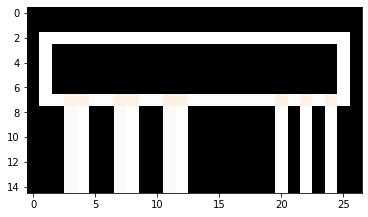

In [3]:
print('size of observation is: ', len(env.make_observation()))
print(env.make_observation())
env.step(0)
env.render_plt()

In [4]:
from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2

amount_gtp = 3
amount_output = 3
buffer_size = 100   
queues = [random.choices(np.arange(1,amount_output+1), [0.15, 0.55, 0.30], k=buffer_size) for item in range(amount_gtp)] # generate random queues
env = simple_conveyor(queues, amount_gtp, amount_output)
# Optional: PPO2 requires a vectorized environment to run
# the env is now wrapped automatically when passing it to the constructor
# env = DummyVecEnv([lambda: env])

model = PPO2(MlpPolicy, env, verbose=1)
model.learn(total_timesteps=10000)

obs = env.reset()
for i in range(1000):
    action, _states = model.predict(obs)
    obs, rewards, dones, info = env.step(action)
    env.render()

ModuleNotFoundError: No module named 'tensorflow.contrib'

In [6]:
import tensorflow
tensorflow.__version__


'2.2.0-rc4'